In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [2]:
np.random.seed(42)

In [3]:
X_inliers = 0.3 * np.random.randn(100,2)

In [4]:
X_inliers

array([[ 0.14901425, -0.04147929],
       [ 0.19430656,  0.45690896],
       [-0.07024601, -0.07024109],
       [ 0.47376384,  0.23023042],
       [-0.14084232,  0.16276801],
       [-0.13902531, -0.13971893],
       [ 0.07258868, -0.57398407],
       [-0.51747535, -0.16868626],
       [-0.30384934,  0.0942742 ],
       [-0.27240722, -0.42369111],
       [ 0.43969463, -0.06773289],
       [ 0.02025846, -0.42742446],
       [-0.16331482,  0.03327678],
       [-0.34529807,  0.11270941],
       [-0.18019161, -0.08750812],
       [-0.18051198,  0.55568346],
       [-0.00404917, -0.31731328],
       [ 0.24676347, -0.36625309],
       [ 0.06265908, -0.58790104],
       [-0.39845581,  0.05905837],
       [ 0.22153997,  0.05141048],
       [-0.03469448, -0.09033111],
       [-0.4435566 , -0.21595326],
       [-0.13819163,  0.31713667],
       [ 0.10308549, -0.52891205],
       [ 0.09722519, -0.11552468],
       [-0.2030766 ,  0.18350289],
       [ 0.30929986,  0.27938404],
       [-0.25176526,

In [26]:
X_inliers + 2

array([[ 6.14901425,  5.95852071],
       [ 6.19430656,  6.45690896],
       [ 5.92975399,  5.92975891],
       [ 6.47376384,  6.23023042],
       [ 5.85915768,  6.16276801],
       [ 5.86097469,  5.86028107],
       [ 6.07258868,  5.42601593],
       [ 5.48252465,  5.83131374],
       [ 5.69615066,  6.0942742 ],
       [ 5.72759278,  5.57630889],
       [ 6.43969463,  5.93226711],
       [ 6.02025846,  5.57257554],
       [ 5.83668518,  6.03327678],
       [ 5.65470193,  6.11270941],
       [ 5.81980839,  5.91249188],
       [ 5.81948802,  6.55568346],
       [ 5.99595083,  5.68268672],
       [ 6.24676347,  5.63374691],
       [ 6.06265908,  5.41209896],
       [ 5.60154419,  6.05905837],
       [ 6.22153997,  6.05141048],
       [ 5.96530552,  5.90966889],
       [ 5.5564434 ,  5.78404674],
       [ 5.86180837,  6.31713667],
       [ 6.10308549,  5.47108795],
       [ 6.09722519,  5.88447532],
       [ 5.7969234 ,  6.18350289],
       [ 6.30929986,  6.27938404],
       [ 5.74823474,

In [8]:
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

In [6]:
X_inliers

array([[ 2.14901425,  1.95852071],
       [ 2.19430656,  2.45690896],
       [ 1.92975399,  1.92975891],
       [ 2.47376384,  2.23023042],
       [ 1.85915768,  2.16276801],
       [ 1.86097469,  1.86028107],
       [ 2.07258868,  1.42601593],
       [ 1.48252465,  1.83131374],
       [ 1.69615066,  2.0942742 ],
       [ 1.72759278,  1.57630889],
       [ 2.43969463,  1.93226711],
       [ 2.02025846,  1.57257554],
       [ 1.83668518,  2.03327678],
       [ 1.65470193,  2.11270941],
       [ 1.81980839,  1.91249188],
       [ 1.81948802,  2.55568346],
       [ 1.99595083,  1.68268672],
       [ 2.24676347,  1.63374691],
       [ 2.06265908,  1.41209896],
       [ 1.60154419,  2.05905837],
       [ 2.22153997,  2.05141048],
       [ 1.96530552,  1.90966889],
       [ 1.5564434 ,  1.78404674],
       [ 1.86180837,  2.31713667],
       [ 2.10308549,  1.47108795],
       [ 2.09722519,  1.88447532],
       [ 1.7969234 ,  2.18350289],
       [ 2.30929986,  2.27938404],
       [ 1.74823474,

In [27]:
len(X_inliers)

400

In [9]:
X_outliers = np.random.uniform(-4,4,(20,2))
X_outliers

array([[ 3.01898458,  1.92614894],
       [ 1.57612593,  1.61987267],
       [-1.12407079, -1.65126525],
       [ 2.47488924,  2.48090716],
       [ 2.93657855,  3.30592442],
       [ 0.09073919,  0.01213036],
       [ 2.38636143,  1.19971145],
       [ 1.61573502,  2.36634136],
       [ 3.12004273, -1.29603875],
       [-0.99533638, -3.24814448],
       [ 0.62624113, -3.71246181],
       [-0.27521585,  0.34115708],
       [-1.70766998,  0.72666608],
       [-3.755998  , -3.70121449],
       [ 2.58080449, -1.11847487],
       [-2.9835159 ,  0.17794608],
       [ 2.15994842, -2.27343178],
       [ 0.98312381, -3.31722028],
       [-3.58654623,  0.25083705],
       [ 0.32508097,  1.09943921]])

In [10]:
X = np.r_[X_inliers, X_outliers]
X

array([[ 4.14901425e+00,  3.95852071e+00],
       [ 4.19430656e+00,  4.45690896e+00],
       [ 3.92975399e+00,  3.92975891e+00],
       [ 4.47376384e+00,  4.23023042e+00],
       [ 3.85915768e+00,  4.16276801e+00],
       [ 3.86097469e+00,  3.86028107e+00],
       [ 4.07258868e+00,  3.42601593e+00],
       [ 3.48252465e+00,  3.83131374e+00],
       [ 3.69615066e+00,  4.09427420e+00],
       [ 3.72759278e+00,  3.57630889e+00],
       [ 4.43969463e+00,  3.93226711e+00],
       [ 4.02025846e+00,  3.57257554e+00],
       [ 3.83668518e+00,  4.03327678e+00],
       [ 3.65470193e+00,  4.11270941e+00],
       [ 3.81980839e+00,  3.91249188e+00],
       [ 3.81948802e+00,  4.55568346e+00],
       [ 3.99595083e+00,  3.68268672e+00],
       [ 4.24676347e+00,  3.63374691e+00],
       [ 4.06265908e+00,  3.41209896e+00],
       [ 3.60154419e+00,  4.05905837e+00],
       [ 4.22153997e+00,  4.05141048e+00],
       [ 3.96530552e+00,  3.90966889e+00],
       [ 3.55644340e+00,  3.78404674e+00],
       [ 3.

In [11]:
n_outliers = len(X_outliers)
ground_truth = np.ones(len(X),dtype = int)
ground_truth[-n_outliers:] = -1

In [12]:
n_outliers

20

In [13]:
ground_truth

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

fit the model for outlier detection (default)

`contamination` = 0.1：范围为 (0, 0.5)，表示样本中的异常点比例，默认为 0.1

In [14]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [15]:
# 异常点返回-1，非异常点返回1
y_pred = clf.fit_predict(X)

In [28]:
# 异常点返回-1，非异常点返回1
y_pred

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [17]:
n_errors = (y_pred != ground_truth).sum()


In [18]:
X_scores = clf.negative_outlier_factor_
X_scores

array([ -0.99920793,  -1.15101418,  -0.97212675,  -1.32659542,
        -0.96943838,  -0.96802782,  -1.1805622 ,  -1.19791797,
        -1.01529652,  -1.15267042,  -1.21993084,  -1.05831363,
        -0.97110275,  -1.02631261,  -0.96154064,  -1.33936984,
        -1.01699286,  -1.10234974,  -1.19346895,  -1.05737435,
        -1.04856181,  -0.96442079,  -1.15370196,  -1.04909785,
        -1.13388154,  -0.97715087,  -0.97998371,  -1.13640206,
        -0.98956357,  -1.02655895,  -0.95728791,  -1.16047442,
        -1.13950345,  -0.99496821,  -0.99185635,  -1.14469959,
        -1.15329396,  -1.93321727,  -0.95681998,  -1.19901531,
        -0.94185764,  -1.25760245,  -1.01278495,  -1.11585158,
        -0.9840512 ,  -0.99559016,  -0.97848957,  -1.1047896 ,
        -0.99211614,  -0.96275604,  -1.09594137,  -0.97642952,
        -0.9472918 ,  -1.43783273,  -0.963528  ,  -1.28600243,
        -1.48832214,  -0.94456349,  -1.04606649,  -1.16681127,
        -1.0681155 ,  -1.29733997,  -1.37714337,  -1.06

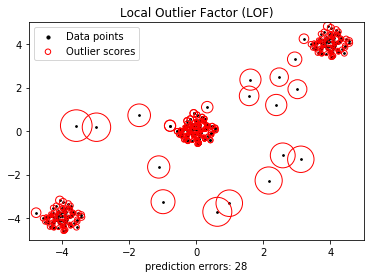

In [32]:
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:,0],X[:,1],color='k',s=3,label="Data points")

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max()-X_scores) /(X_scores.max() - X_scores.min())

plt.scatter(X[:,0],X[:,1],s=1000*radius,edgecolor='r',
          facecolor = 'None',label = "Outlier scores")

plt.axis('tight')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [30]
plt.savefig('./LOF离群点检测')
plt.show()


In [30]:
#获取每一个样本点的 LOF 值，该函数范围 LOF 值的相反数，需要取反号
clf._decision_function(X)

array([ 3.26077889e-01,  1.76630571e-01,  3.49028483e-01,  2.48581930e-02,
        3.50473497e-01,  3.49964514e-01,  1.59180363e-01,  1.35668684e-01,
        3.06068095e-01,  1.69896940e-01,  1.31661856e-01,  2.68220941e-01,
        3.57824620e-01,  2.99596246e-01,  3.56344891e-01,  1.32934173e-02,
        3.09687165e-01,  2.35844551e-01,  1.47012481e-01,  2.70572777e-01,
        2.69641184e-01,  3.56390070e-01,  1.87050087e-01,  2.82018266e-01,
        1.86345419e-01,  3.41114399e-01,  3.37794143e-01,  1.98966029e-01,
        3.41913140e-01,  2.94351668e-01,  3.62902003e-01,  1.61982643e-01,
        2.04551702e-01,  3.27144383e-01,  3.40052738e-01,  2.00073209e-01,
        1.87985833e-01, -5.68363727e-01,  3.61128969e-01,  1.26683425e-01,
        3.75969682e-01,  9.52392464e-02,  3.12789861e-01,  2.23399115e-01,
        3.38231899e-01,  3.26747664e-01,  3.45128057e-01,  2.23597506e-01,
        3.30122961e-01,  3.58400863e-01,  2.31456976e-01,  3.46129250e-01,
        3.71473083e-01, -

In [31]:
clf.kneighbors(X)

(array([[0.        , 0.0208558 , 0.0742596 , ..., 0.2191102 , 0.22113865,
         0.22431989],
        [0.        , 0.07034995, 0.08600579, ..., 0.35666368, 0.35983265,
         0.36068177],
        [0.        , 0.04083528, 0.07178018, ..., 0.1789023 , 0.18291119,
         0.19008905],
        ...,
        [0.        , 0.53252335, 1.57302594, ..., 3.03919338, 3.03919338,
         3.04145259],
        [0.        , 0.60741969, 1.93819226, ..., 3.18433433, 3.1938534 ,
         3.1938534 ],
        [0.        , 0.46673293, 0.46673293, ..., 0.73704039, 0.73704039,
         0.74249213]]), array([[  0,  93,  54, ...,  90,   2,  86],
        [  1,  32,  35, ...,  92,   3,  23],
        [  2,  21,  49, ...,  86,  28,  42],
        ...,
        [417, 410, 416, ..., 269, 169, 117],
        [418, 415, 412, ..., 150, 219, 119],
        [419, 162, 262, ..., 288, 188, 115]], dtype=int64))